# Scénario

Vous êtes consultant chez LaPage, une grande librairie généraliste en ligne très réputée. Vous êtes directement rattaché au service Marketing. Lapage était originellement une librairie physique avec points de vente. Mais devant le succès de certains de ses produits et l'engouement de ses clients, elle a décidé depuis 2 ans d'ouvrir un site de vente en ligne. Vous intervenez car l'entreprise souhaite faire le point après deux ans d'exercice, et pouvoir analyser ses points forts, ses points faibles, les comportements cients et etc. Nous aimerions faire le point à présent. Cela nous permettra de décider de la marche à suivre, par exemple décider si nous devons créer certaines offres, adapter certains prix, etc.

Cette analyse va être découpée en deux parties :
<ol>
    <li>Une analyse des différents indicateurs de vente, qui a été demandée directement.</li>
    <ol>
        <li>Dans un premier temps, on va avoir besoin de différents indicateurs et graphiques autour du chiffre d'affaires. Peux-tu également regarder l'évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale ? Il serait également intéressant de faire un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie, etc.</li>
        <li>Enfin, on aimerait avoir quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.</li>
    </ol>
    <li>Une analyse plus ciblée sur les clients : l'objectif serait cette fois-ci de comprendre le comportement de nos clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via nos librairies physiques. On aimera que tu regardes en particulier :</li>
    <ol>
        <li>le lien entre le genre d'un client et les catégories des livres achetés;</li>
        <li>et ensuite le lient entre l'âge des clients et le montant total des achats, la fréquance d'achat, la taille du panier moyen et les catégories des livres achetés</li>
    </ol>
</ol>

# Remarques

<ol>
    <li>Détail du nettoyage des données : vous présenterez l'ensemble de données exploitable.</li>
    <li>Restitution de l'analyse : les chiffres clés, KPI, graphiques générés corrélation calculées, etc. (le calcul de l'indicateur de corrélation (R²; eta², Chi²) et la mise en place d'un test statistique est nécessaire)

# Ressources

<ol>
    <li>Réalisez des graphiques compréhensibles <font color = aqua>https://openclassrooms.com/fr/courses/4525336-realisez-des-rapports-statistiques-clairs-et-impactants/5193755-choisissez-des-graphiques-adaptes-a-votre-message</font></li>
    <li>Maitrisez les bases des probabilites <font color = cyan>https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites</font></li>
    <li>Realisez des rapports statistiques clairs et impactants <font color = cyan>https://openclassrooms.com/fr/courses/4525336-realisez-des-rapports-statistiques-clairs-et-impactants</font></li>
    <li>Initiez vous a la statistique inferentielle <font color = cyan>https://openclassrooms.com/fr/courses/4525306-initiez-vous-a-la-statistique-inferentielle</font></li>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df_customers = pd.read_csv('data/customers.csv')
df_products = pd.read_csv('data/products.csv')
df_transactions = pd.read_csv('data/transactions.csv')

In [65]:
df_products.describe()
df_products['price'].sort_values()
df_products[df_products['price'] == -1]
df_transactions[df_transactions['id_prod'] == 'T_0']

# TODO: Supprimer tout les données test dans le dataframe (products et customers)
df_transactions = df_transactions[df_transactions['id_prod'] != 'T_0']

In [66]:
df = pd.merge(df_customers, df_transactions, how='left', on='client_id')
df = pd.merge(df, df_products, how='left', on='id_prod')
df.shape

(679355, 8)

In [67]:
df.columns

Index(['client_id', 'sex', 'birth', 'id_prod', 'date', 'session_id', 'price',
       'categ'],
      dtype='object')

In [68]:
chiffre_affaire = df['price'].sum() 

print(f"Le chiffre d'affaire est de {chiffre_affaire} €")

Le chiffre d'affaire est de 11853728.680000003 €


In [69]:
df['date'].isna().sum()
df['date'] = df['date'].loc[df['date'].isna() == False]


In [70]:
df['date'] = pd.to_datetime(df['date'])

In [71]:
df['year'] = df['date'].dt.year


In [72]:
# évolution du prix au cours du temps (par année)
df.groupby(df['year']).sum()

,birth,price,categ
year,,,
2021.0,550510596,4.770827e+06,115812.0
2022.0,685293464,6.108682e+06,159044.0
2023.0,107786337,9.742203e+05,25279.0


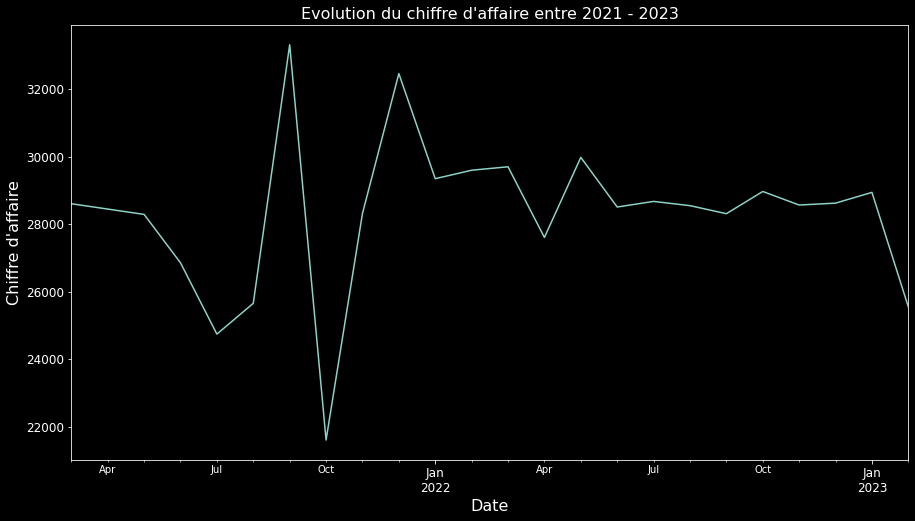

In [73]:
ca_year = df.copy()
ca_year.set_index('date', inplace = True)

plt.figure(figsize=[15,8])
ax = ca_year.resample('M').count()['price'].plot()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.set_title("Evolution du chiffre d'affaire entre 2021 - 2023",fontsize=16)
ax.set_ylabel("Chiffre d'affaire",fontsize=16)
ax.set_xlabel("Date",fontsize=16)
plt.show()

Nous remarquons une chute du Chiffre d'affaire en Octobre.

In [81]:
df_oct = df[df['year'] == 2021]
df_oct = df_oct[df_oct['date'].dt.month == 10]
df_oct['week'] = df_oct['date'].dt.week


<ipython-input-81-dbafd3ca801b>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_oct['week'] = df_oct['date'].dt.week


<AxesSubplot:xlabel='week', ylabel='price'>

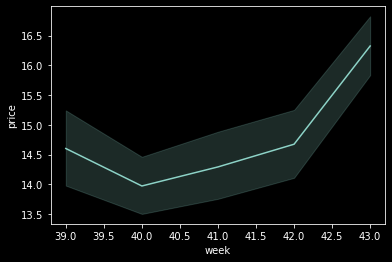

In [86]:
sns.lineplot(x='week', y='price', data=df_oct)